In [1]:
import numpy
import os
from bp import competition

In [2]:
patients = [i.strip() for i in open('/scr-ssd/mimic3wdb/train.txt').readlines()]
targets = competition.load_targets(patients[:7500], part='train')

In [3]:
records = {}
for record in targets:
    patient = record.split('_')[0]
    if patient in records:
        records[patient].append(record)
    else:
        records[patient] = [record]

patients = sorted(records)

reduce_fn = numpy.mean

sys = numpy.zeros(len(patients))
dia = numpy.zeros(len(patients))
            
for i in patients:
    y = numpy.concatenate([targets[j] for j in records[i]])
    j = patients.index(i)
    
    s = y[:,0][~numpy.isnan(y[:,0])]
    s = s[s > 0]
    sys[j] = reduce_fn(s) if s.size > 0 else numpy.nan
    
    d = y[:,1][~numpy.isnan(y[:,1])]
    d = d[d > 0]
    dia[j] = reduce_fn(d) if d.size > 0 else numpy.nan

sys = sys[~numpy.isnan(sys)]
sys = sys[sys > 0]
dia = dia[~numpy.isnan(dia)]
dia = dia[dia > 0]
    
[reduce_fn(sys), reduce_fn(dia)]

[121.17782346758283, 60.77147218239589]

In [4]:
%matplotlib notebook
from matplotlib import pyplot

<IPython.core.display.Javascript object>


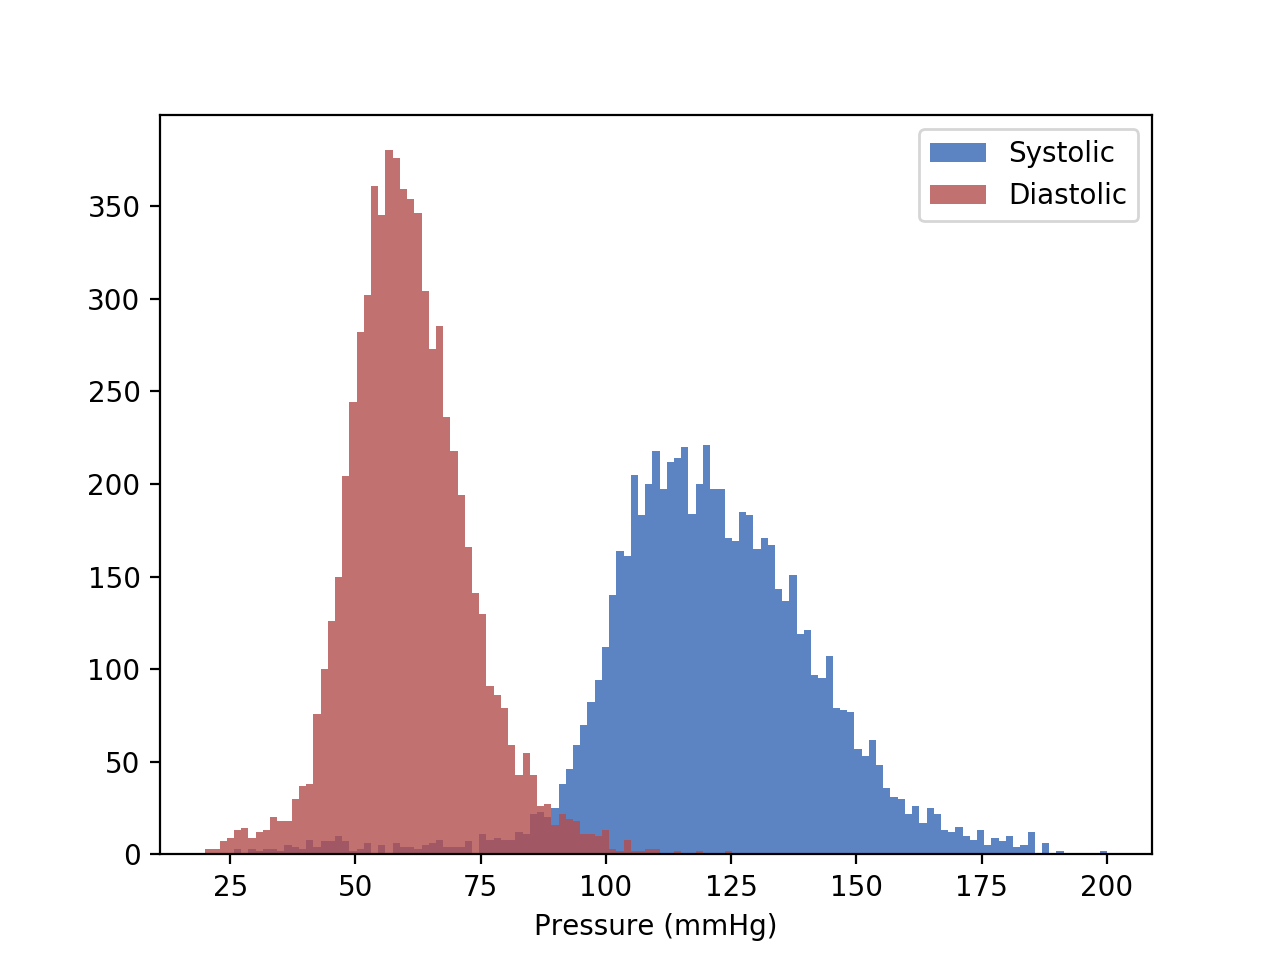

In [5]:
fig = pyplot.figure()
args = {'bins': 125, 'range': (20, 200)}
sys_bins = pyplot.hist(sys, color=(0.2, 0.4, 0.7, 0.8), **args)
dia_bins = pyplot.hist(dia, color=(0.7, 0.3, 0.3, 0.8), **args)
pyplot.xlabel('Pressure (mmHg)')
pyplot.legend(['Systolic', 'Diastolic'])

In [6]:
records = {}
for record in targets:
    patient = record.split('_')[0]
    if patient in records:
        records[patient].append(record)
    else:
        records[patient] = [record]

patients = sorted(records)

reduce_fn = numpy.std

sys = numpy.zeros(len(patients))
dia = numpy.zeros(len(patients))
            
for i in patients:
    y = numpy.concatenate([targets[j] for j in records[i]])
    y = y.astype('float64')
    j = patients.index(i)
    
    s = y[:,0][~numpy.isnan(y[:,0])]
    s = s[(s > 20) & (s < 200)]
    sys[j] = reduce_fn(s) if s.size > 10 else numpy.nan
    
    d = y[:,1][~numpy.isnan(y[:,1])]
    d = d[(d > 20) & (d < 200)]
    dia[j] = reduce_fn(d) if d.size > 10 else numpy.nan

sys = sys[~numpy.isnan(sys)]
dia = dia[~numpy.isnan(dia)]

[sys.mean(), dia.mean()]

[14.105130379255499, 8.218402725326003]

<IPython.core.display.Javascript object>


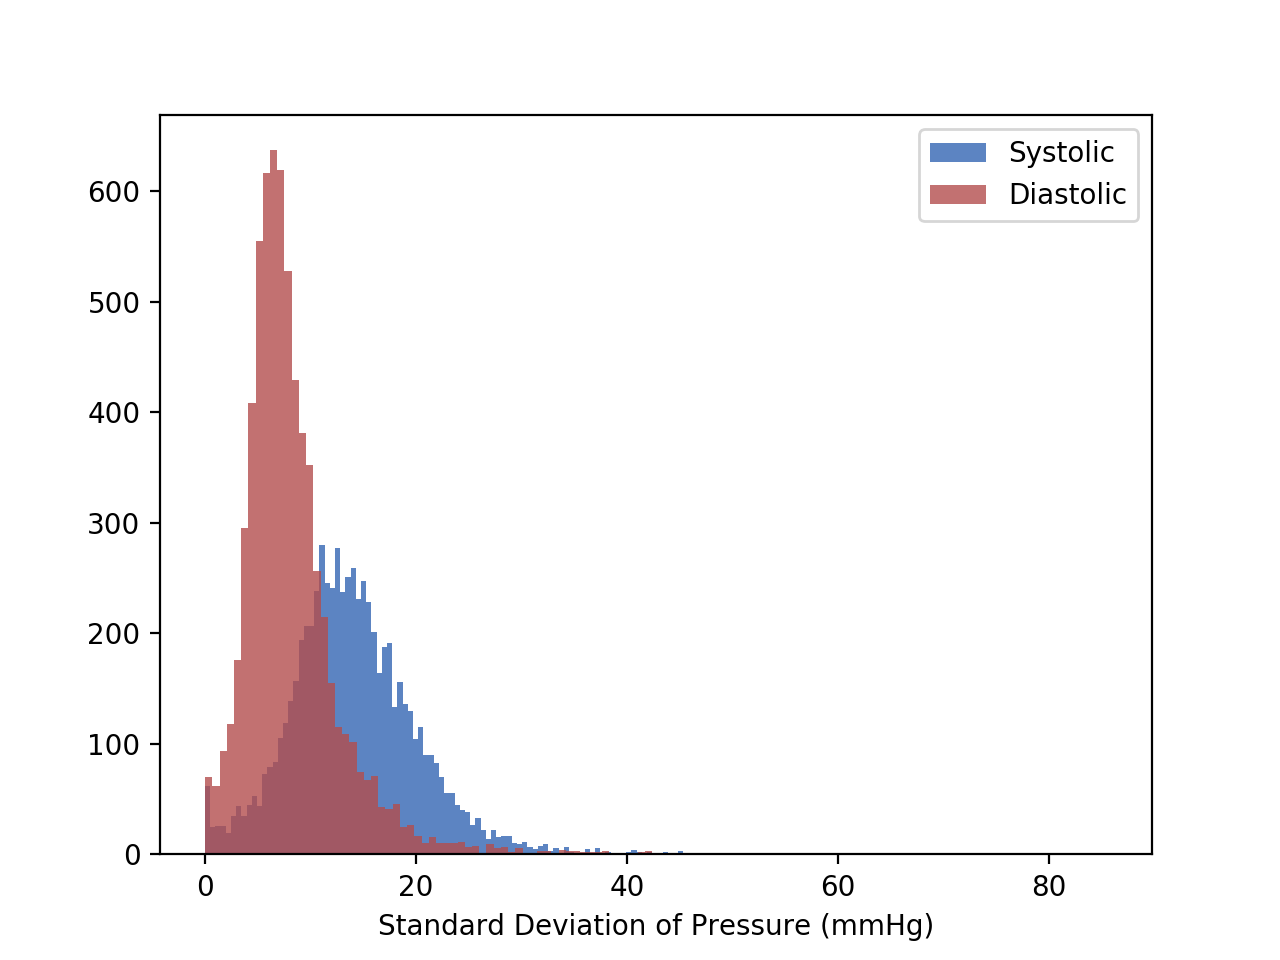

In [7]:
fig = pyplot.figure()
args = {'bins': 125}
sys_bins = pyplot.hist(sys, color=(0.2, 0.4, 0.7, 0.8), **args)
dia_bins = pyplot.hist(dia, color=(0.7, 0.3, 0.3, 0.8), **args)
pyplot.xlabel('Standard Deviation of Pressure (mmHg)')
pyplot.legend(['Systolic', 'Diastolic'])

In [8]:
records = {}
for record in targets:
    patient = record.split('_')[0]
    if patient in records:
        records[patient].append(record)
    else:
        records[patient] = [record]

patients = sorted(records)

pulse_pressure = numpy.zeros(len(patients))
            
for i in patients:
    y = numpy.concatenate([targets[j] for j in records[i]])
    y = y.astype('float64')
    j = patients.index(i)
    
    p = y[:,0] - y[:,1] 
    p = p[~numpy.isnan(p)]
    pulse_pressure[j] = numpy.mean(p) if p.size > 10 else numpy.nan

pulse_pressure = pulse_pressure[~numpy.isnan(pulse_pressure)]
pulse_pressure.mean()

60.723776374294424

<IPython.core.display.Javascript object>


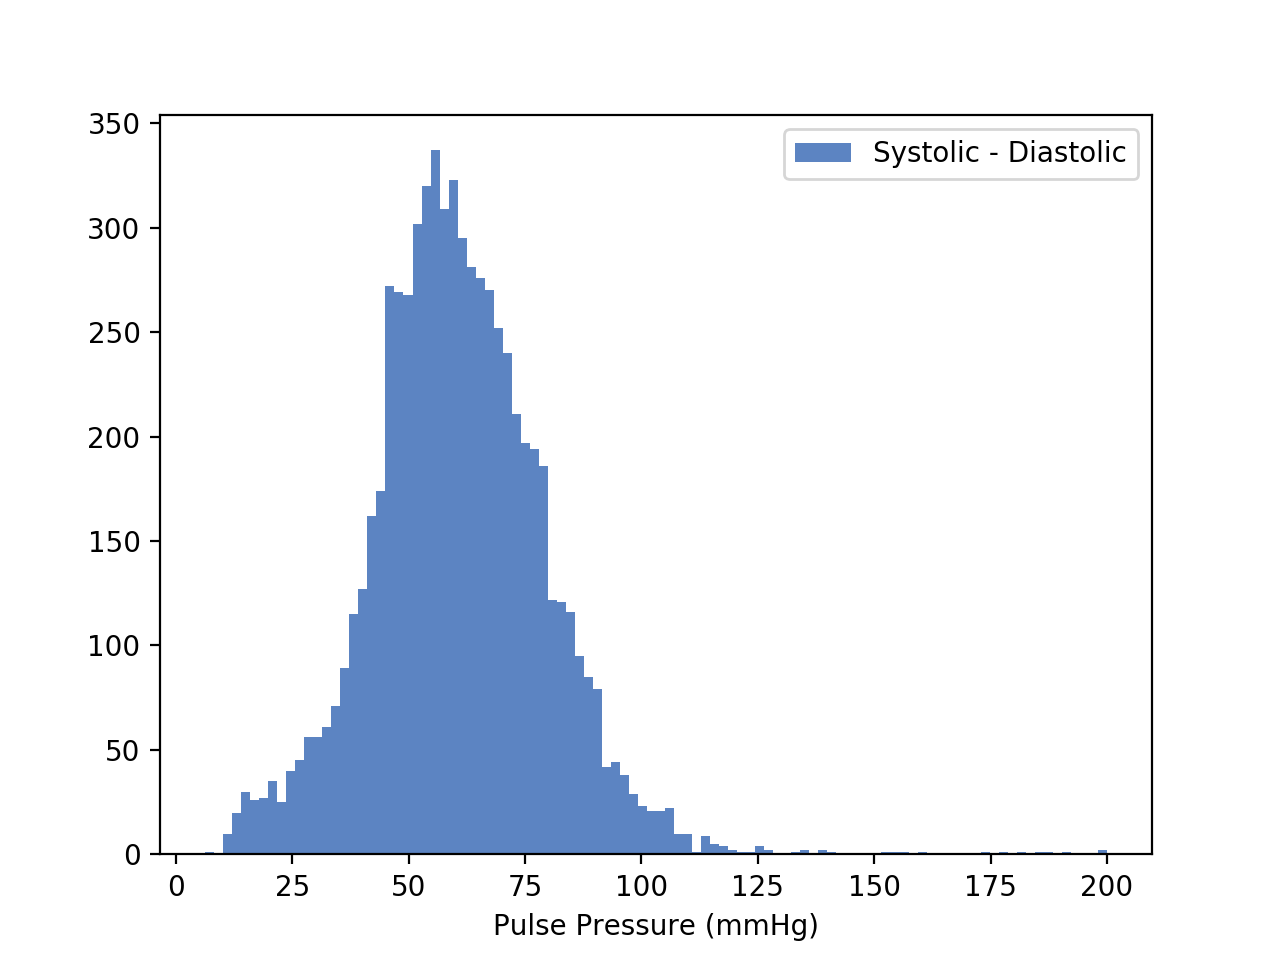

In [9]:
fig = pyplot.figure()
args = {'bins': 100}
sys_bins = pyplot.hist(pulse_pressure, color=(0.2, 0.4, 0.7, 0.8), **args)
pyplot.xlabel('Pulse Pressure (mmHg)')
pyplot.legend(['Systolic - Diastolic'])